# Aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import orm, load_profile
load_profile()

workflow_json_filename =  "aiida_simple.json"

In [2]:
from workflow import (
    get_sum as _get_sum,
    get_prod_and_div as _get_prod_and_div,
    get_square as _get_square,
)

In [3]:
wg = WorkGraph("arithmetic")

In [4]:
get_prod_and_div_task = wg.add_task(
    task(outputs=['prod', 'div'])(_get_prod_and_div),
    x=orm.Float(1),
    y=orm.Float(2),
)

In [5]:
get_sum_task = wg.add_task(
    _get_sum,
    x=get_prod_and_div_task.outputs.prod,
    y=get_prod_and_div_task.outputs.div,
)

In [6]:
get_square_task = wg.add_task(
    _get_square,
    x=get_sum_task.outputs.result,
)

In [7]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

In [8]:
!cat {workflow_json_filename}

{
  "version": "0.1.0",
  "nodes": [
    {
      "id": 0,
      "type": "function",
      "value": "workflow.get_prod_and_div"
    },
    {
      "id": 1,
      "type": "function",
      "value": "workflow.get_sum"
    },
    {
      "id": 2,
      "type": "function",
      "value": "workflow.get_square"
    },
    {
      "id": 3,
      "type": "input",
      "name": "x",
      "value": 1.0
    },
    {
      "id": 4,
      "type": "input",
      "name": "y",
      "value": 2.0
    },
    {
      "id": 5,
      "type": "output",
      "name": "result"
    }
  ],
  "edges": [
    {
      "target": 1,
      "targetPort": "x",
      "source": 0,
      "sourcePort": "prod"
    },
    {
      "target": 1,
      "targetPort": "y",
      "source": 0,
      "sourcePort": "div"
    },
    {
      "target": 2,
      "targetPort": "x",
      "source": 1,
      "sourcePort": null
    },
    {
      "target": 0,
      "targetPort": "x",
      "source": 3,
      "sourcePort": null
    },
    {
    

## Load Workflow with jobflow

In [9]:
from python_workflow_definition.jobflow import load_workflow_json

In [10]:
from jobflow.managers.local import run_locally

In [11]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [12]:
result = run_locally(flow)
result

2025-05-24 05:37:36,950 INFO Started executing jobs locally
2025-05-24 05:37:37,216 INFO Starting job - get_prod_and_div (3ea26df7-3e4f-4541-a399-52684f0d763e)
2025-05-24 05:37:37,218 INFO Finished job - get_prod_and_div (3ea26df7-3e4f-4541-a399-52684f0d763e)
2025-05-24 05:37:37,219 INFO Starting job - get_sum (8d0957e4-21b1-433e-8e9a-b2af7b2d9b6d)
2025-05-24 05:37:37,220 INFO Finished job - get_sum (8d0957e4-21b1-433e-8e9a-b2af7b2d9b6d)
2025-05-24 05:37:37,221 INFO Starting job - get_square (af8ae958-4ce4-4b1f-a5df-eb7768a9aa86)
2025-05-24 05:37:37,223 INFO Finished job - get_square (af8ae958-4ce4-4b1f-a5df-eb7768a9aa86)
2025-05-24 05:37:37,223 INFO Finished executing jobs locally


{'3ea26df7-3e4f-4541-a399-52684f0d763e': {1: Response(output={'prod': 2.0, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))},
 '8d0957e4-21b1-433e-8e9a-b2af7b2d9b6d': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))},
 'af8ae958-4ce4-4b1f-a5df-eb7768a9aa86': {1: Response(output=6.25, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan/example_workflows/arithmetic'))}}

## Load Workflow with pyiron_base

In [13]:
from python_workflow_definition.pyiron_base import load_workflow_json

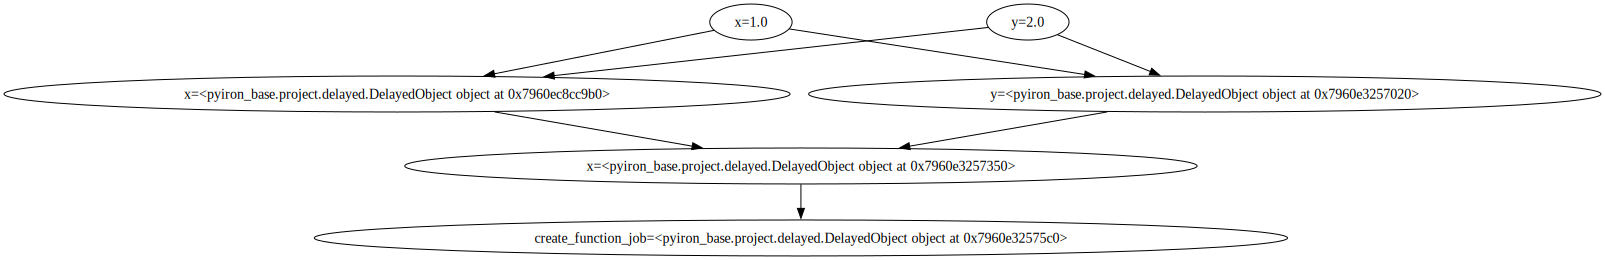

In [14]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [15]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_4729edf2c689ca4cf512acd163c98b28 was saved and received the ID: 1
The job get_sum_25f72a559657d0b1549593792391953e was saved and received the ID: 2
The job get_square_9cc2f0545498916d7720c59c1120a66d was saved and received the ID: 3


6.25